In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
df = pd.read_csv('book_dt.csv')


In [2]:
print(df.shape)
df.head()

(120, 5)


,Book Title,Author Name,Publication_Date,Popularity_Score,Issued
0,The Great Gatsby,F. Scott Fitzgerald,1925,8,1
1,To Kill a Mockingbird,Harper Lee,1960,9,1
2,1984,George Orwell,1949,7,1
3,The Catcher in the Rye,J.D. Salinger,1951,6,1
4,Pride and Prejudice,Jane Austen,1813,8,1


In [3]:
from sklearn import preprocessing 
def encode_feature(array):
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array)

In [4]:
df_feature = df.keys()
print(df_feature)

Index(['Book Title', 'Author Name', 'Publication_Date', 'Popularity_Score',
       'Issued'],
      dtype='object')


In [5]:
df['Author Name'] = encode_feature(df['Author Name'])
df  = df.drop(['Book Title'] ,axis =1)
print(df)

     Author Name  Publication_Date  Popularity_Score  Issued
0             37              1925                 8       1
1             42              1960                 9       1
2             39              1949                 7       1
3             45              1951                 6       1
4             49              1813                 8       1
..           ...               ...               ...     ...
115           15              2000                 9       0
116            9              2017                 7       0
117            5              1984                 8       0
118            0              1999                 9       0
119           12              2017                 8       0

[120 rows x 4 columns]


In [8]:
# Select the features and target variable
X = df[['Publication_Date','Author Name', 'Popularity_Score']]
y = df['Issued']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the test set labels
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)



Accuracy: 79.16666666666666


[Text(0.33405172413793105, 0.95, 'X[1] <= 19.0\ngini = 0.489\nsamples = 96\nvalue = [41, 55]\nclass = 1'),
 Text(0.06896551724137931, 0.85, 'X[0] <= 2012.0\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = 0'),
 Text(0.034482758620689655, 0.75, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = 0'),
 Text(0.10344827586206896, 0.75, 'X[1] <= 8.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.06896551724137931, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.13793103448275862, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.5991379310344828, 0.85, 'X[1] <= 64.5\ngini = 0.439\nsamples = 80\nvalue = [26, 54]\nclass = 1'),
 Text(0.33620689655172414, 0.75, 'X[1] <= 28.5\ngini = 0.366\nsamples = 58\nvalue = [14, 44]\nclass = 1'),
 Text(0.20689655172413793, 0.65, 'X[1] <= 25.5\ngini = 0.498\nsamples = 15\nvalue = [8, 7]\nclass = 0'),
 Text(0.1724137931034483, 0.55, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.24

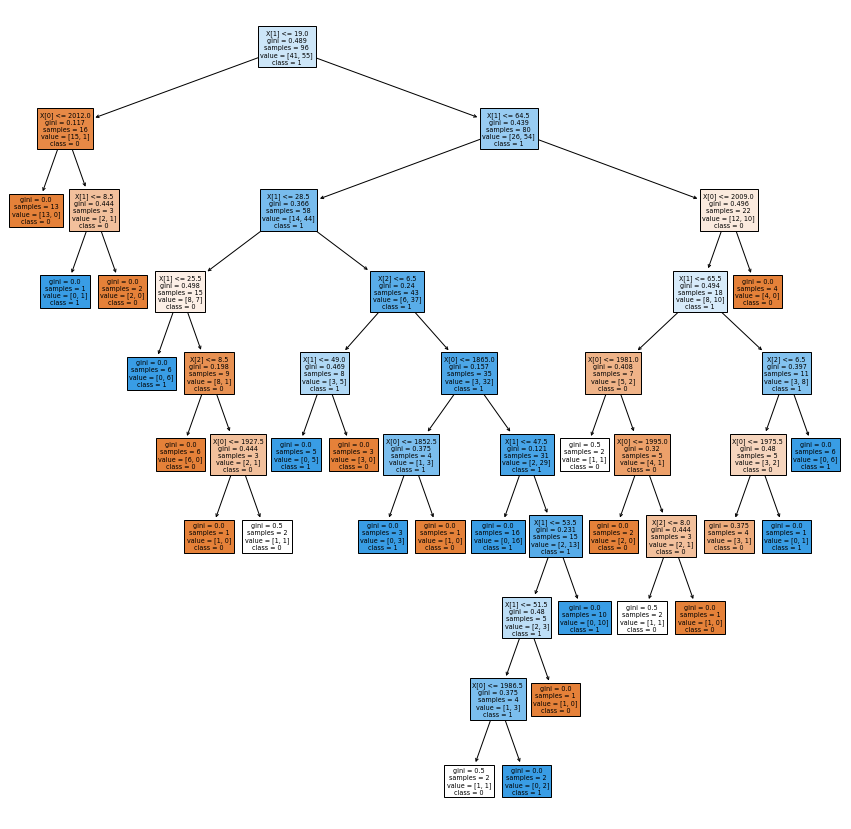

In [7]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True ,class_names=['0','1'],max_depth=None)